<a href="https://colab.research.google.com/github/juccaicedoac03/Data_Science_Course/blob/main/2_Supervised_learning/3_NonLinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least Squares: Non Linear Extension

Linear regression: 

$$ \omega^* = \arg\min_\omega \|y-Xw\|^2_2$$

[sklearn.kernel ridge.KernelRidge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)

**Kernel Ridge:**



\begin{equation}
\omega^* = \arg\min_\omega \|y-\Phi \omega\|^2_2 + \alpha\|\omega\|^2_2
\end{equation}

\begin{equation}
\omega^* = (\Phi^\top \Phi+\alpha I)^{-1}\Phi^\top y
\end{equation}


\begin{equation}
\omega^* = \Phi^\top(\Phi \Phi^\top+\alpha I)^{-1}y = k(\cdot)^\top(K+\alpha I)^{-1}y
\end{equation}

**Exercise:**

- Find the analytical  solution of kernel ridge regression (See [Kernel Ridge Regression](https://web2.qatar.cmu.edu/~gdicaro/10315-Fall19/additional/welling-notes-on-kernel-ridge.pdf) y [supplementary material](https://github.com/amalvarezme/AnaliticaDatos/blob/master/6_TopicosAvanzados/introKernels.pdf) pg 8 and 9).


# Example

To Solve non linear regression problem:

Supose that: 

$$y = sinc(x) + \eta$$

With 

$$\eta\sim p(\eta)=\mathcal{N}(\eta|\mu_\eta,\sigma_\eta^2)=\frac{1}{\sqrt{2\pi\sigma^2_\eta}}\exp\left(\frac{-\|\eta-\mu_\eta\|_2^2}{2\sigma^2_\eta}\right)$$ 

and $\mu_{\eta} = 0$

**NOTE:**

$${\rm{sinc}}(\theta)=\frac{\sin(\theta)}{\theta}$$

## Import libraries

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances as dist

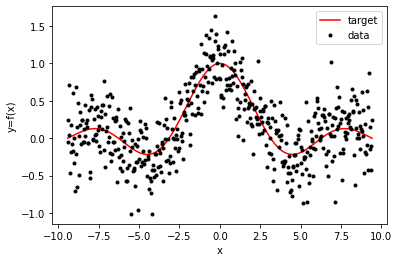

In [4]:
N = 500 #Samples
X = np.linspace(-3*np.pi,3*np.pi,N) #input vector 
y = np.sinc(X/np.pi) #sinc function -> target
var = 0.1 # noise variance
mue = 0 # noise mean
noise = mue + np.sqrt(var)*np.random.randn(X.shape[0])# white gaussian noise
yn = y + noise # nosi signal 


plt.plot(X,y,'r',label='target' )
plt.plot(X,yn,'k.',label='data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

create input and output vector for training machine learning model

In [5]:
ydata = yn.reshape(-1,1)
Xdata = X.reshape(-1,1)
print(Xdata.shape) # N = 500 samples, P = 1 features
print(ydata.shape) # N = 500, 1-D regression

(500, 1)
(500, 1)


(350, 1)
(150, 1)


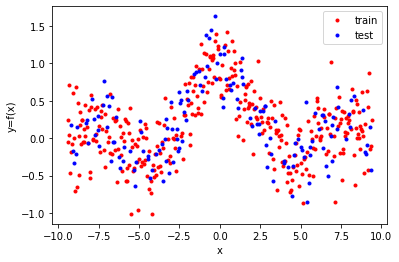

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3)#train test split
print(X_train.shape)
print(X_test.shape)

plt.plot(X_train,y_train,'r.',label='train' )
plt.plot(X_test,y_test,'b.',label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

We use the [Kernel. Ridge model ](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) with  radial basis function (rbf) as *kernel*:


$$\kappa(x,x') = \exp\left(\frac{-\gamma\|x-x'\|^2_2}{2}\right)$$

**Nota:** $\gamma\in\mathbb{R}^+$ hyperparameter is known as precision and aims to scale the notion of resemblance between the points. Precision is commonly related to the bandwidth parameter. ("variance") $\sigma\in\mathbb{R}^+$ of rbf model as follows:

$$\gamma=\frac{1}{\sigma^2}$$

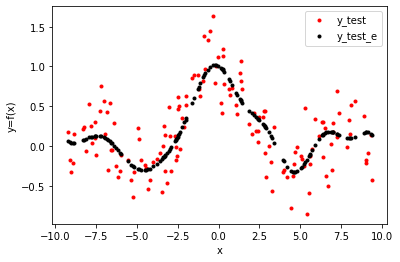

In [8]:
gamma = 0.1 #gamma
alpha = 0.001 # L2-regularization value
reg = KernelRidge(kernel='rbf',gamma=gamma, alpha = alpha)
reg.fit(X_train,y_train) #fit the model

#prediction
y_test_e = reg.predict(X_test)
y_train_e = reg.predict(X_train)

plt.plot(X_test,y_test,'r.',label='y_test' )
plt.plot(X_test,y_test_e,'k.',label='y_test_e')
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

Hyperparameter search is needed

In [11]:
steps=[('reg', KernelRidge(kernel = 'rbf'))]
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],              
              'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
              }

pipeline = Pipeline(steps = steps)

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=10,scoring='neg_mean_absolute_error',verbose=100,refit=True)

grid_search.fit(X_train, y_train)

#best training model
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits

Mejores parámetros:

{'reg__alpha': 0.001, 'reg__gamma': 0.1}


Testing data are evaluated using best model

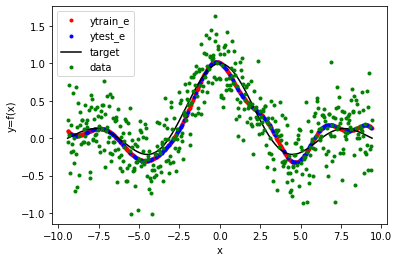

In [16]:
y_test_e = grid_search.best_estimator_.predict(X_test)
y_train_e = grid_search.best_estimator_.predict(X_train)
plt.plot(X_train,y_train_e,'r.',label='ytrain_e' )
plt.plot(X_test,y_test_e,'b.',label='ytest_e')
plt.plot(X,y,'k',label='target' )
plt.plot(Xdata,ydata,'g.',label='data' )
plt.legend()
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

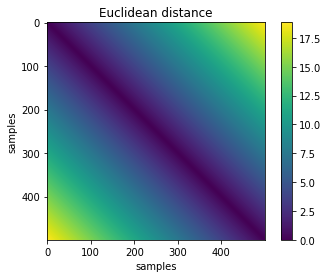

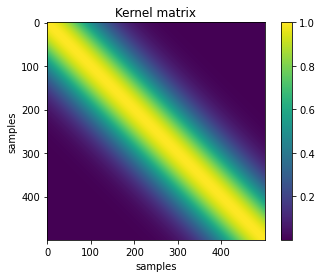

In [17]:
D = dist(X.reshape(-1,1),X.reshape(-1,1)) #dissimilarity
K = np.exp(-.5*gamma*D**2)
D.shape
plt.imshow(D)
plt.colorbar()
plt.xlabel('samples')
plt.ylabel('samples')
plt.title('Euclidean distance')
plt.show()

plt.imshow(K)
plt.colorbar()
plt.xlabel('samples')
plt.ylabel('samples')
plt.title('Kernel matrix')
plt.show()

Remember that:

\begin{equation}
\kappa(x,x') = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\|x-x'\|_2^2}{2\sigma^2}\right) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left(\frac{-\gamma\|x-x'\|_2^2}{2}\right) 
\end{equation}

# Exersice:

Visualize the rbf kernel for 5 different noise conditions by tuning the model hyperparameters using gridsearch. *TIP*: modify the noise variance.
